# Pandas 简介

Pandas，是 python+data+analysis 的组合缩写，是 python 中基于 numpy 和 matplotlib 的第三方数据分析库，与后两者共同构成了 python 数据分析的基础工具包，享有数分三剑客之名。

我们知道，构建和处理二维、多维数组是一项繁琐的任务。Pandas 为解决这一问题，在ndarray 数组（numpy 中的数组）的基础上构建出了两种不同的数据结构，分别是 Series（一维数据结构）, Pandas dataframe （二维数据结构）：

Series 是带标签的一维数组，这里的标签可以理解为索引，但这个索引并不局限于整数，它也可以是字符类型，比如 a、b、c 等；而 Pandas dataframe 是一种表格型数据结构，它既有行标签，又有列标签。在本节，我们主要介绍 pandas dataframe。

#  认识 pandas dataframe 

## 1 什么是pandas dataframe 

pandas dataframe 是一个表格型的数据结构，既有行标签（index），又有列标签（columns），它也被称异构数据表，所谓异构，指的是表格中每列的数据类型可以不同，比如可以是字符串、整型或者浮点型等。pandas dataframe 中每个值都称为一个单元格，该单元格在表格结构中具有特定的行索引和列索引。

## 2 pandas dataframe 的特征

pandas dataframe 的每一行数据都可以看成一个 Series 结构，只不过，pandas dataframe 为这些行中每个数据值增加了一个列标签。并且 pandas dataframe 具有其独特的特征，使其与其他数据结构区分开来： 

（1）pandas dataframe 中的每个列都可以有一个标签名称（即标题名称），并且可以包含与其相邻列不同的数据类型。                         
（2）默认情况下，每行都有一个索引，其值范围从0开始。但是，pandas dataframe 中的行索引也可以设置为标签（例如位置名称，日期）。pandas dataframe 中的所有单元格都具有行索引和列索引（即二维表结构），即使pandas dataframe 中只有一个单元格也是如此。                                   
（3）除了通过基于位置索引选择单元格（例如，第 1 行第 1 列的单元格）之外，我们还可以根据特定值（例如，查询特定文本字符串或数值）在 pandas dataframe 内查询数据。     
（4）由于其固有的表格结构，pandas 数据帧还允许单元格具有空值（即没有数据值，例如空格，-999 等）。                                          


## 3 pandas dataframe 可以用来做什么

**（1）读取数据**                                             
read_csv() 表示从 CSV 文件中读取数据，并创建 DataFrame 对象。                          
关于文件读取时，文件路径怎么书写，我们在前边的章节以及学习过了，就不再赘述。                                                                           
注：我们在本小节用来示例的csv文件为同一个。

In [57]:
import pandas as pd
#需要注意文件的路径
df=pd.read_csv('https://ndownloader.figshare.com/files/12710618')
print (df)

   months  precip seasons
0     Jan    0.70  Winter
1     Feb    0.75  Winter
2     Mar    1.85  Spring
3     Apr    2.93  Spring
4     May    3.05  Spring
5    June    2.02  Summer
6    July    1.93  Summer
7     Aug    1.62  Summer
8    Sept    1.84    Fall
9     Oct    1.31    Fall
10    Nov    1.39    Fall
11    Dec    0.84  Winter


**（2）查看数据内容**                                    
当数据量很大时我们可以选择查看 pandas dataframe 的某几行，此功能对于无法在 Jupyter  Notebook 中轻松显示的大型数据集非常有用。
例如读取上述文件前面五行：

In [69]:
import pandas as pd
df=pd.read_csv('https://ndownloader.figshare.com/files/12710618')
print(df.head())

  months  precip seasons
0    Jan    0.70  Winter
1    Feb    0.75  Winter
2    Mar    1.85  Spring
3    Apr    2.93  Spring
4    May    3.05  Spring


**（3）描述数据类型**                                        
pandas dataframe中，利用*info()* 方法可以返回表格的一些基本信息。例如：输出行数，列数，列名以及数据类型等。
下面我们来看一个实例：

In [70]:
import pandas as pd
df=pd.read_csv('https://ndownloader.figshare.com/files/12710618')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   months   12 non-null     object 
 1   precip   12 non-null     float64
 2   seasons  12 non-null     object 
dtypes: float64(1), object(2)
memory usage: 416.0+ bytes
None


**（4）对数值进行统计计算**                                          
从描述统计学角度出发，我们可以对 DataFrame 结构执行聚合计算等其他操作。
*sum、mean、count、max、min* 这五个函数属于最常用的几个函数。                                                                       
示例：对precip列求平均值

In [78]:
import pandas as pd
df=pd.read_csv('https://ndownloader.figshare.com/files/12710618')
print(df['precip'].mean())

1.6858333333333333


**（5）对数值进行排序**                                                  
我们在 numpy 数组小节中介绍过如何识别最大值，最小值，但是要是用在本节的示例文件，我们不能使降水与月份产生联系，但是使用 pandas dataframe 我们可以使数据按降序排序，以查找最大值及其对应的月份。
下面是示例:
可以看出降水量最大的月份是五月。

In [96]:
import pandas as pd
df=pd.read_csv('https://ndownloader.figshare.com/files/12710618')
df = df.sort_values(by="precip",ascending=False)  # by指定按哪列排序。ascending表示是否升序
print(df.head())

  months  precip seasons
4    May    3.05  Spring
3    Apr    2.93  Spring
5   June    2.02  Summer
6   July    1.93  Summer
2    Mar    1.85  Spring


**（6）快速绘图**                                                             
这里是一个简单的示例：

<AxesSubplot:xlabel='a', ylabel='b'>

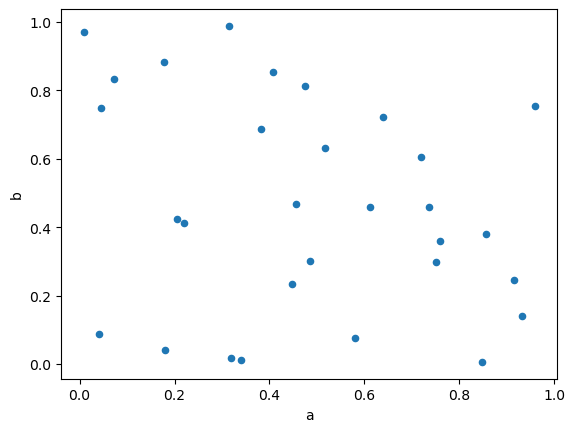

In [116]:
import pandas as pd
import numpy as np
df = pd.DataFrame(np.random.rand(30, 4), columns=['a', 'b', 'c', 'd'])
df.plot.scatter(x='a',y='b')

# pandas dataframe 数据索引

## 1 pandas dataframe 数据索引的两种方式

pandas dataframe 中有两种索引方式：**基于位置索引**和**基于标签索引**。

一个 DataFrame 对象表示一个电子表格，带有单元格值、列名和行索引标签。因此，该结构支持使用索引选择数据，例如选择在某在行和列交点的位置标识的单个单元格。我们还可以使用特定标签（如列名称）从 pandas 数据帧中选择数据，而无需知道该数据在 pandas 数据帧中的位置。

**（1）基于位置索引**                                                                                                                              
我们可以使用基于位置的索引来查询 pandas dataframe 中的数据，并提供行和列选择作为范围(即沿行和列的开始和停止位置)。  
**（2）基于标签的索引**                                 
pandas dataframe 也可以使用基于标签的索引进行查询，此功能非常有用，因为我们可以使用要用于组织和查询数据的特定列（即标签）为 pandas dataframe 创建索引。
**（3）筛选数据**                                                                                                                                                                         
除了使用索引之外，我们还可以通过查询满足特定条件的值来选择或筛选 pandas dataframe中的数据。例如，我们可以使用以下命令根据列中的特定值选择 pandas 数据帧中的数据：
```
dataframe[dataframe["column"] == value]
```
这将返回指定列中包含该值的所有行。

## 2 pandas dataframe 数据索引练习

在这里我们使用的l练习数据与第二部分相同                                                                                                  
**（1）loc：通过行、列的名称或标签来索引**\
使用 loc 的语法是：
```
data.loc[<row selection>, <column selection>]
```
当通过标签索引的切片方式来筛选数据时，它的取值前闭后闭，也就是只包括边界值标签（开始和结束）。  
**示例1：索引第二行的值，行标签是“1”**

In [17]:
import pandas as pd
import numpy as np
data = pd.read_csv('https://ndownloader.figshare.com/files/12710618')
data1 = data.loc[1]
print(data1)

months        Feb
precip       0.75
seasons    Winter
Name: 1, dtype: object


**示例2：读取第二列的值**

In [18]:
import pandas as pd
import numpy as np
data = pd.read_csv('https://ndownloader.figshare.com/files/12710618')
data1 = data.loc[ : ,"months"]
print(data1)

0      Jan
1      Feb
2      Mar
3      Apr
4      May
5     June
6     July
7      Aug
8     Sept
9      Oct
10     Nov
11     Dec
Name: months, dtype: object


**示例3: 读取第1行到第2行，第2列到第3列的值**

In [20]:
import pandas as pd
import numpy as np
data = pd.read_csv('https://ndownloader.figshare.com/files/12710618')
data1 = data.loc[1:3,"months":"precip"]
print(data1)

  months  precip
1    Feb    0.75
2    Mar    1.85
3    Apr    2.93


**（2）iloc：通过行、列的索引位置来寻找数据**                                 
Pandas中的 iloc 是用基于整数的下标来进行数据定位/选择
iloc 的语法是
```
data.iloc[<row selection>, <column selection>]
```
 iloc 在 pandas 中是用来通过数字来选择数据中具体的某些行和列。你可以设想每一行都有一个对应的下标（0,1,2，…)，通过 iloc 我们可以利用这些下标去选择相应的行数据。同理，对于行也一样，想象每一列也有对应的下标(0,1,2,…),通过这些下标也可以选择相应的列数据。我们可以选择具体的某行某列，也可以行列混合选择。
 通过整数索引切片选择数据时，前闭后开(不包含边界结束值)。同 python 和 numpy 一样，它们的索引都是从 0 开始。

**示例1：读取第2行,第2列的值**

In [22]:
import pandas as pd
import numpy as np
data = pd.read_csv('https://ndownloader.figshare.com/files/12710618')
data1 = data.iloc[1,1]
print(data1)

0.75


**示例2：进行切片操作**
按 index 和 columns 进行切片操作
读取第2、3行，第2、3列

In [23]:
import pandas as pd
import numpy as np
data = pd.read_csv('https://ndownloader.figshare.com/files/12710618')
data1 = data.iloc[1:3,1:3]
print(data1)

   precip seasons
1    0.75  Winter
2    1.85  Spring


**（3）使用特定值筛选数据**                              
除了基于位置和基于标签的索引之外，我们还可以使用以下命令根据列中的特定值选择或筛选数据：
```
dataframe[dataframe["column"] == value]
```
这将返回指定列中包含该值的所有行。
如果使用文本字符串列选择数据，则需要加引号,例如”text"

**示例1：筛选出 precip 大于 2mm 的数据**

In [30]:
import pandas as pd
import numpy as np
df = pd.read_csv('https://ndownloader.figshare.com/files/12710618')
df = df[df["precip"]>2]
print(df)

  months  precip seasons
3    Apr    2.93  Spring
4    May    3.05  Spring
5   June    2.02  Summer


**示例2：筛选出夏季的数据**

In [31]:
import pandas as pd
import numpy as np
df = pd.read_csv('https://ndownloader.figshare.com/files/12710618')
df = df[df["seasons"] == "Summer"]
print(df)

  months  precip seasons
5   June    2.02  Summer
6   July    1.93  Summer
7    Aug    1.62  Summer


**示例3：使用筛选出来的值生成一个新的 dataframe**
我们可以通过将输出设置为等于筛选器的输出，将输出保存到新的数据帧。
示例：筛选一月的数值保存到新的数据帧

In [34]:
import pandas as pd
import numpy as np
df = pd.read_csv('https://ndownloader.figshare.com/files/12710618')
df1 = df[df["months"] == "Jan"]
print(df1)

  months  precip seasons
0    Jan     0.7  Winter
